

In linear regression, the model targets to get the best-fit regression line to predict the value of y based on the given input value (x). While training the model, the model calculates the cost function which measures the Root Mean Squared error between the predicted value (pred) and true value (y). The model targets to minimize the cost function. 

To minimize the cost function, the model needs to have the best value of θ1 and θ2. Initially model selects θ1 and θ2 values randomly and then iteratively update these value in order to minimize the cost function until it reaches the minimum. By the time model achieves the minimum cost function, it will have the best θ1 and θ2 values. Using these finally updated values of θ1 and θ2 in the hypothesis equation of linear equation, the model predicts the value of x in the best manner it can. 

Therefore, the question arises – How do θ1 and θ2 values get updated? 
Linear Regression Cost Function:
 


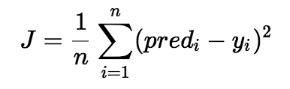

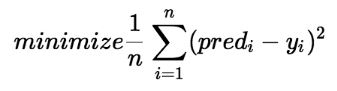

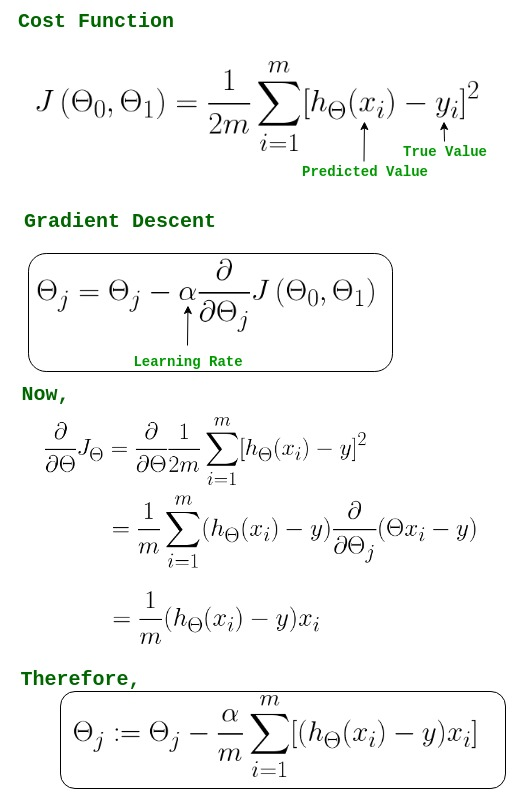

100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


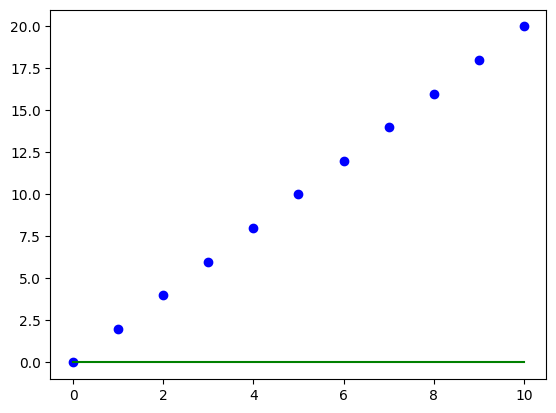

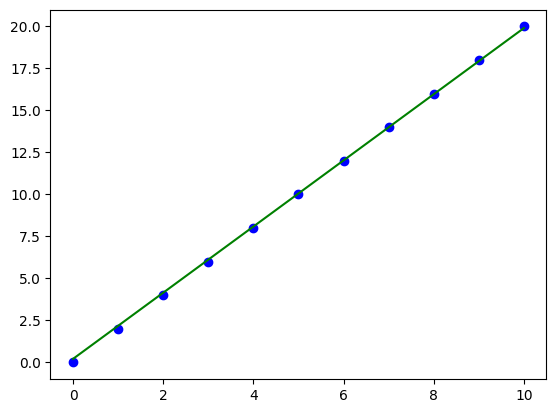

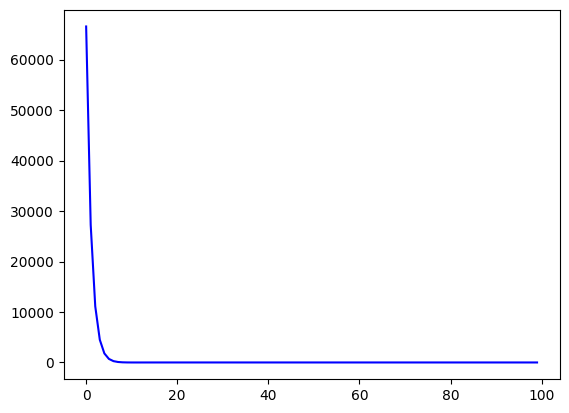

In [1]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()


In [2]:
X = np.array([i for i in range(11)])
Y = np.array([2*i for i in range(11)])

In [3]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
Y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [6]:
regressor = Linear_Regression(X, Y)

iterations = 0
steps = 100
learning_rate = 0.01
costs = []
	
	#original best-fit line
Y_pred = regressor.predict()
Y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
b = [0, 0]
def predict(X=[]):
		Y_pred = np.array([])
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred

In [11]:
predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
def plot_best_fit( Y_pred, fig):
			f = plt.figure(fig)
			plt.scatter(X, Y, color='b')
			plt.plot(X, Y_pred, color='g')
			f.show()

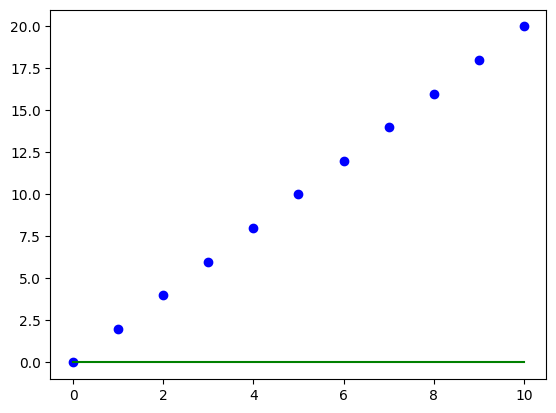

In [13]:
plot_best_fit(Y_pred, 'Initial Best Fit Line')

https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/?ref=rp

https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/

Iteration 1: Cost 4352.088931274409, Weight 		0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight 		1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight 		1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight 		1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight 		1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight 		1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight 		1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight 		1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight 		1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight 		1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352, Weight 		1.389253895811451, Bias 0.0351295475583

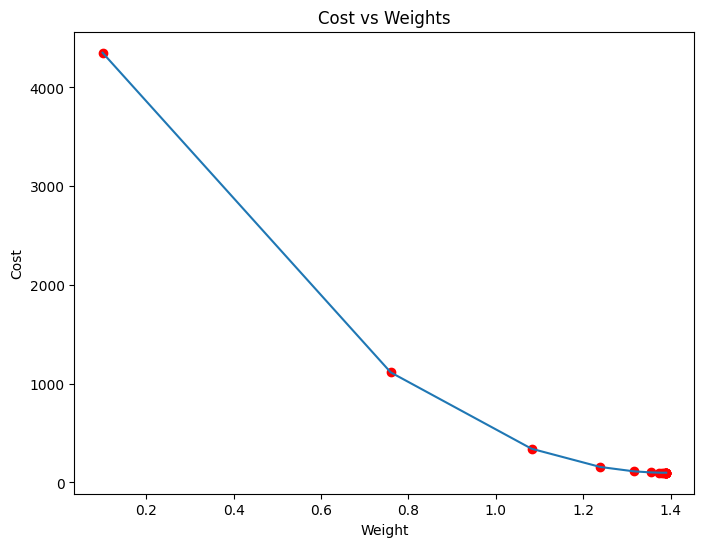

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


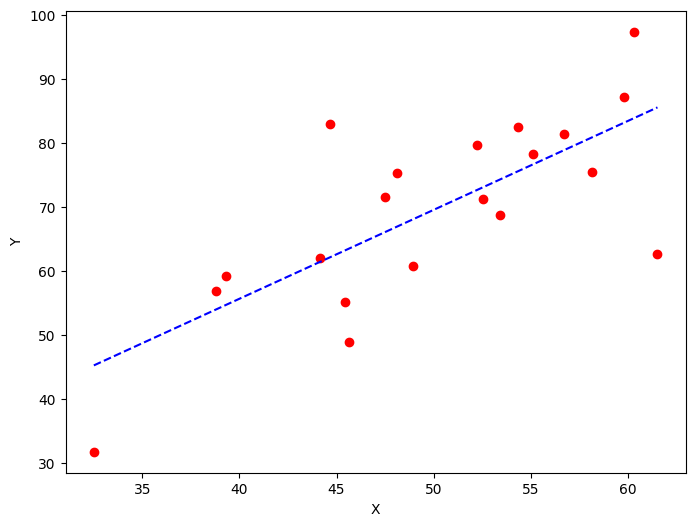

In [14]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
	
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):
	
	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_weight * x) + current_bias
		
		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)
		
		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")
	
	
	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()
	
	return current_weight, current_bias


def main():
	
	# Data
	X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
		55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
		45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
		48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
	Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
		78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
		55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
		60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

	# Estimating weight and bias using gradient descent
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
	print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

	# Making predictions using estimated parameters
	Y_pred = estimated_weight*X + estimated_bias

	# Plotting the regression line
	plt.figure(figsize = (8,6))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()

	
if __name__=="__main__":
	main()
